In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
data_path = "student-mat.csv"
data = pd.read_csv(data_path)
data.head()
#data.columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

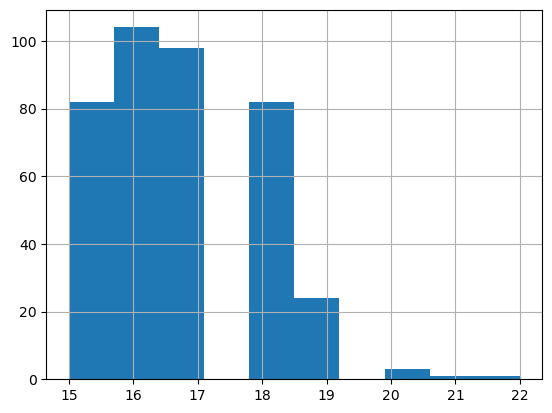

In [4]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['age'].hist();

<Axes: ylabel='Walc'>

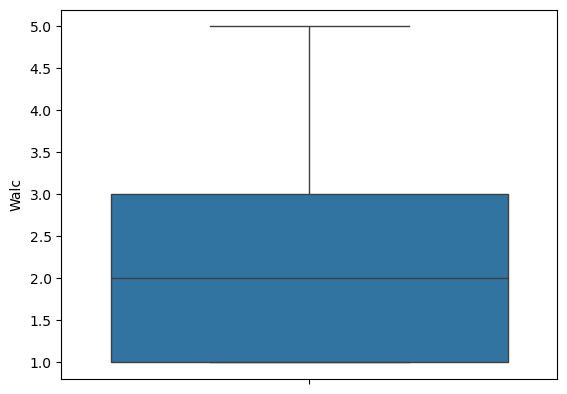

In [5]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(y=data['Walc'])

<Axes: xlabel='age', ylabel='Walc'>

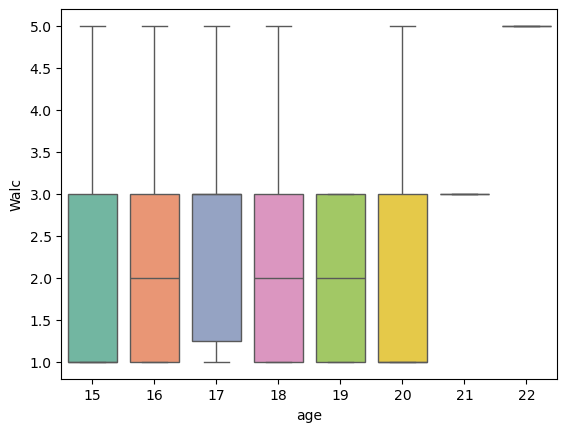

In [6]:
top_data = data[['age','Walc']]
top_data = top_data.groupby('Walc').sum()
top_data = top_data.sort_values('age',ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Walc', 
            x='age', 
             data=data[data.Walc.isin(top_data)], palette='Set2', legend=False, hue='age')

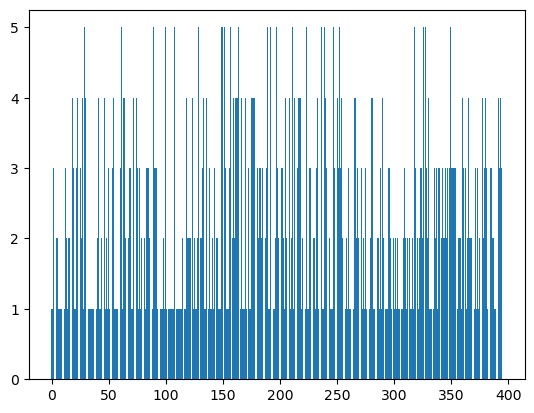

In [7]:
plt.bar(data.index, data['Walc'])
plt.show()

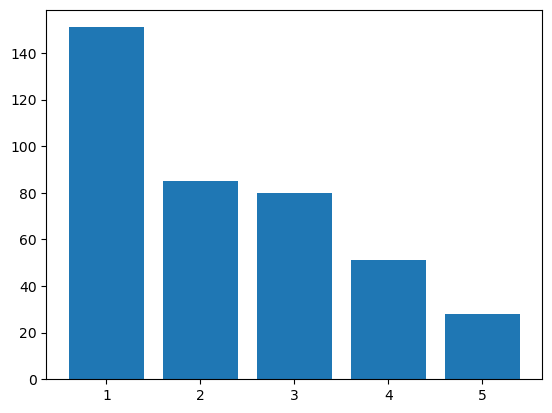

In [8]:
hist = data['Walc'].value_counts()
plt.bar(hist.index, hist);


In [9]:
feats=[f for f in data.columns if 'G' in f]
feats


['G1', 'G2', 'G3']

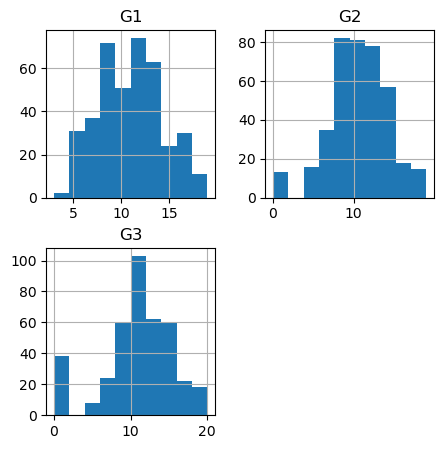

In [10]:
data[feats].hist(figsize=(5,5));

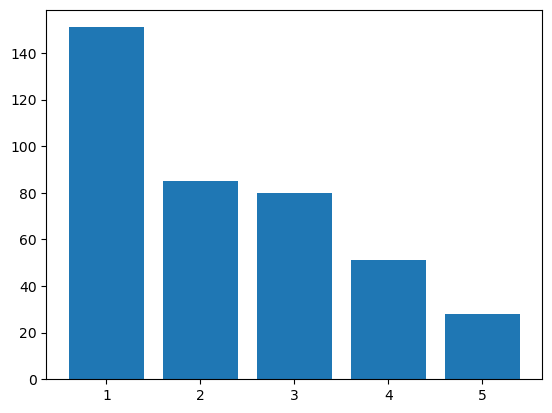

In [11]:
# определение количества учеников употреб. алкоголь
hist = data['Walc'].value_counts()
plt.bar(hist.index, hist);


In [12]:
# фактически бинарный признак
data['Walc'].value_counts()

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

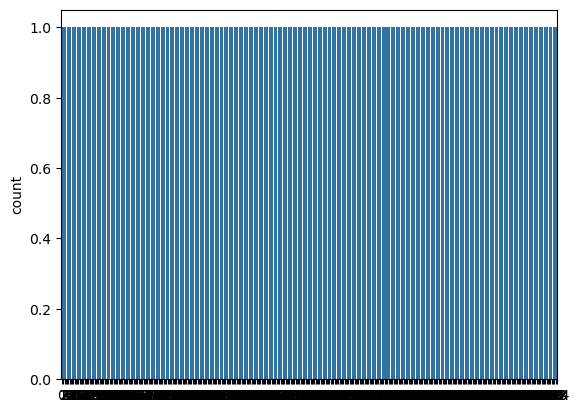

In [13]:
sns.countplot(data['Medu']);

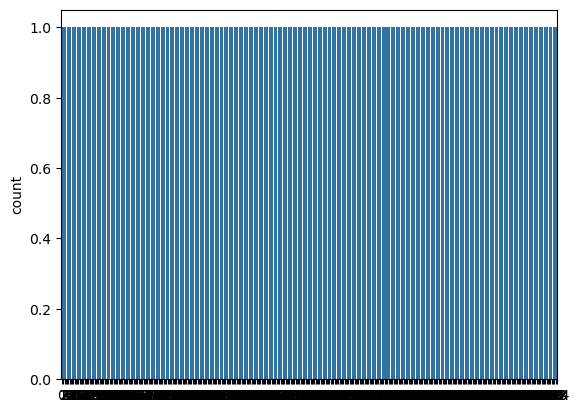

In [14]:
sns.countplot(data['health']);

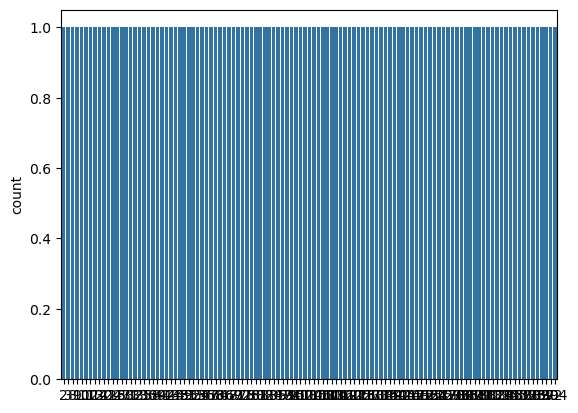

In [15]:
sns.countplot(data[data['age'].isin(data['age'].value_counts().tail(5).index)]['age']);

In [16]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
feats = [f for f in data.columns if 'i' in f]
len(feats)

11

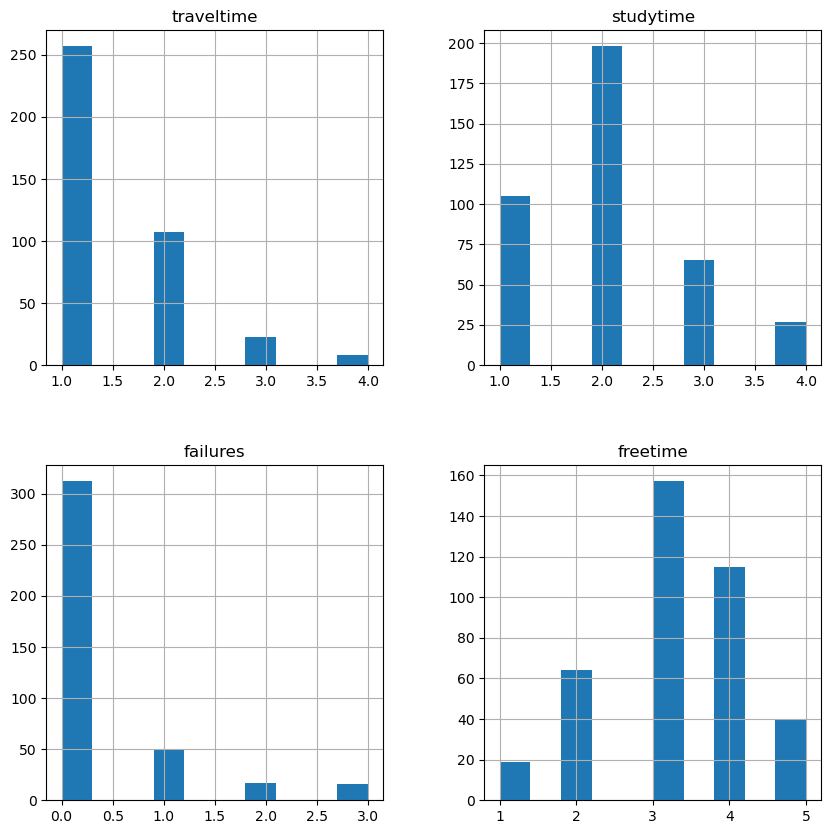

In [18]:
# строим отдельные гистограммы 
# для нескольких признаков
data[feats].hist(figsize=(10,10));

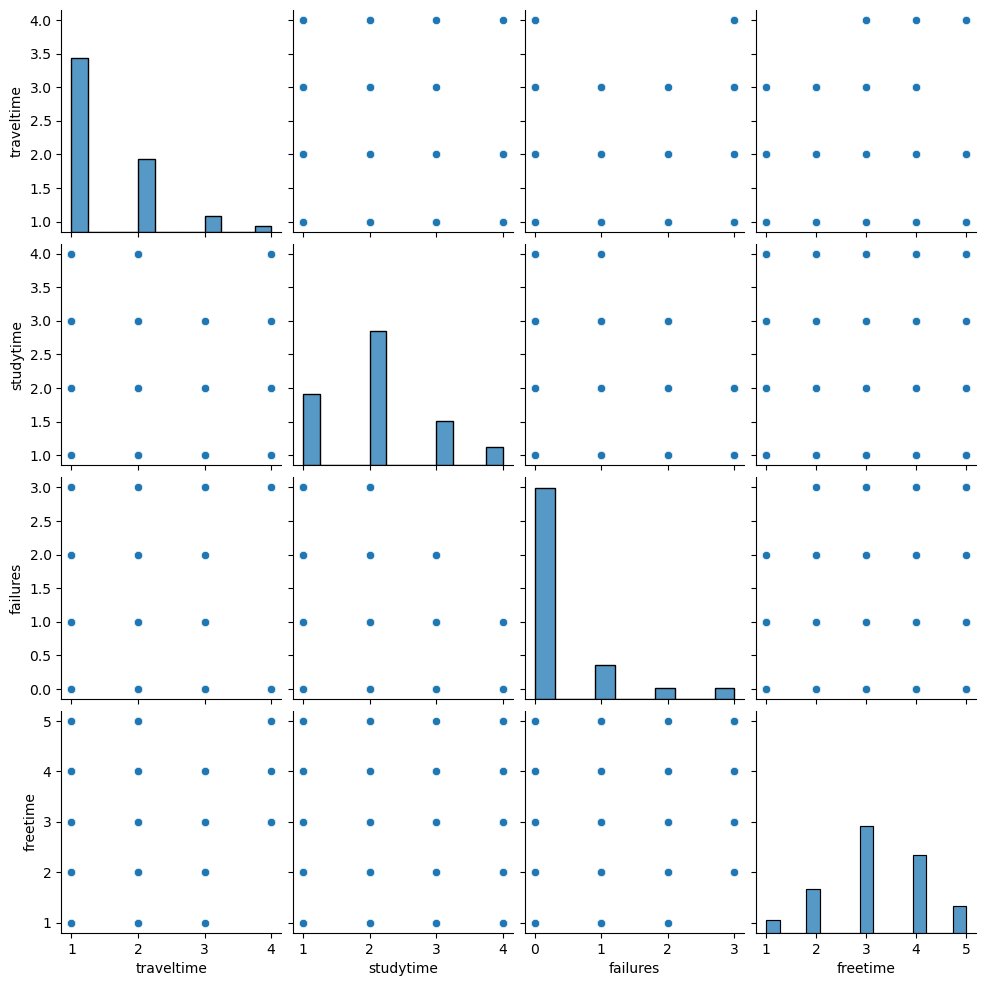

In [19]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

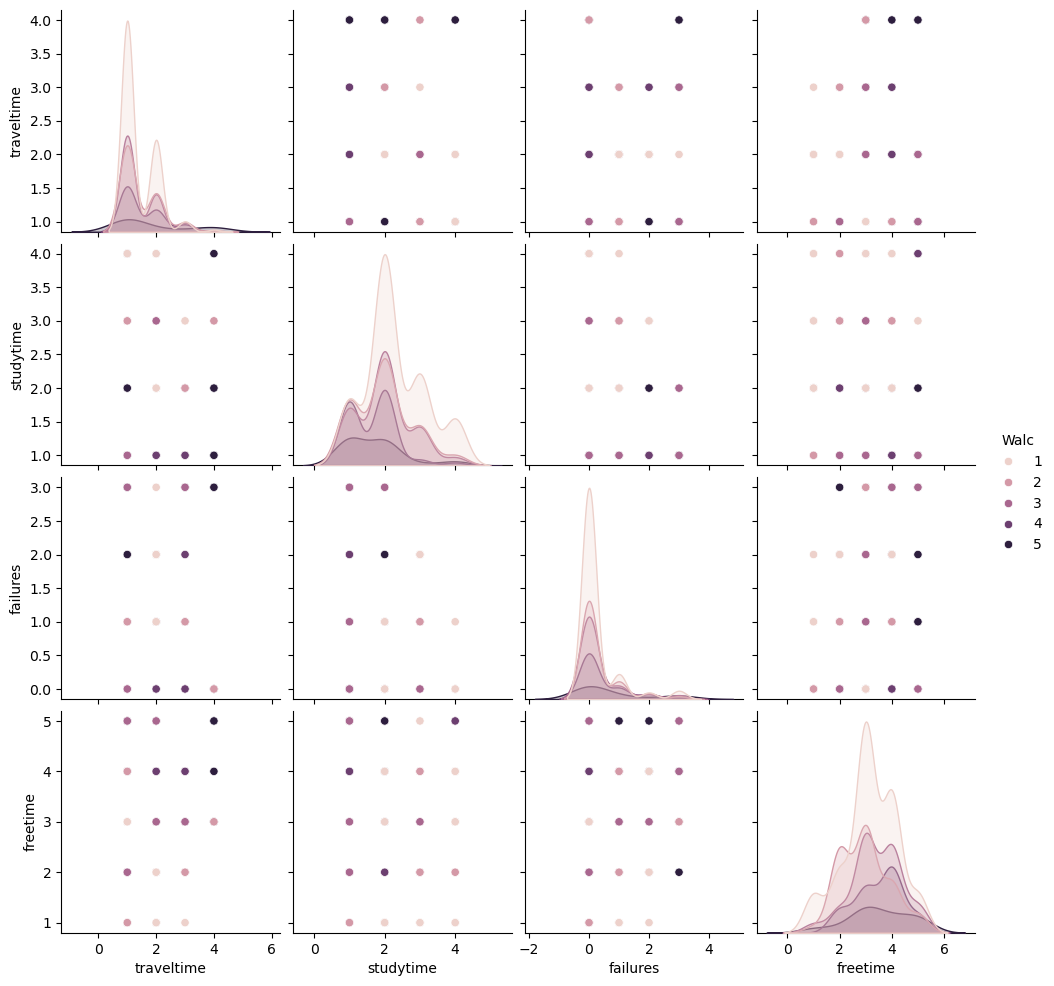

In [20]:
sns.pairplot(data[feats + ['Walc']], hue='Walc');

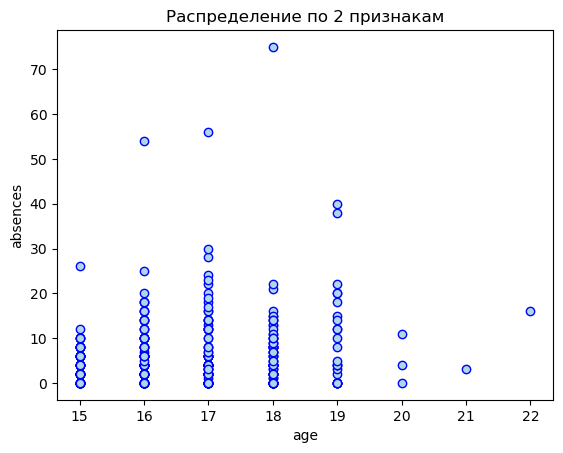

In [21]:
plt.scatter(data['age'], 
            data['absences'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('age')
plt.ylabel('absences')
plt.title('Распределение по 2 признакам');

In [22]:
#Корреляция признаков
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


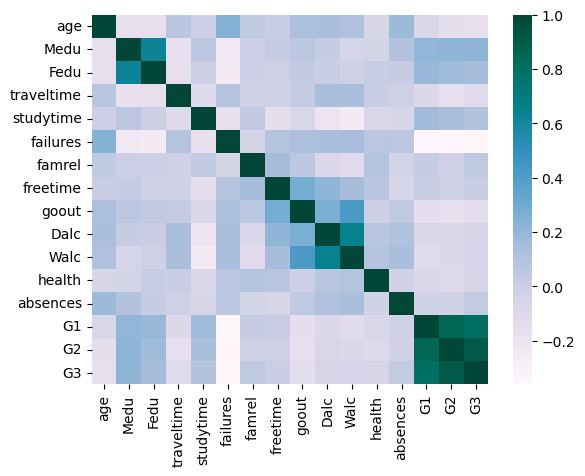

In [23]:
sns.heatmap(numeric_data.corr(), cmap=plt.cm.PuBuGn);

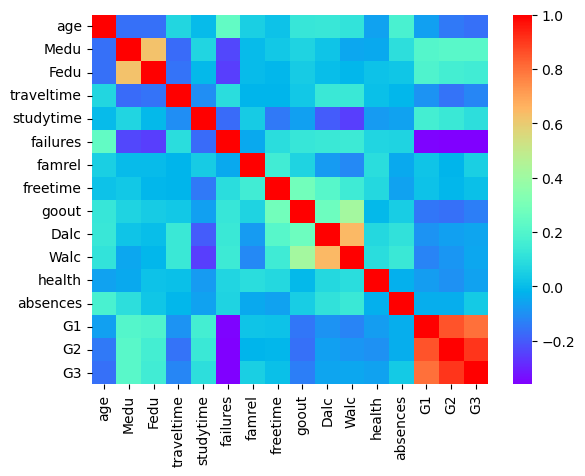

In [24]:
# Удаление коррелирующих признаков
sns.heatmap(numeric_data.corr(), cmap=plt.cm.rainbow);